# 09 - Interpolação em Triângulos

Para essa atividade vamos usar o Numpy e Matplotlib. Assim vamos carregar as bibliotecas.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.tri as mtri


Vamos definir algumas funções auxiliares que vão nos ajudar a exibir os gráficos.

In [2]:
# Faz o setup para desenhar gráficos
def graph():
    fig = plt.figure()
    ax = plt.axes()
    plt.grid()
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.axhline(0, color='black') # deixa o X do eixo 0 em destaque
    ax.axvline(0, color='black') # deixa o Y do eixo 0 em destaque
    ax.set_aspect('equal') # Não suportado em todas as plataformas
    ax.set(xlabel='x', ylabel='y')
    fig.tight_layout()
    return ax

Faça a correção perspectiva com o código abaixo.

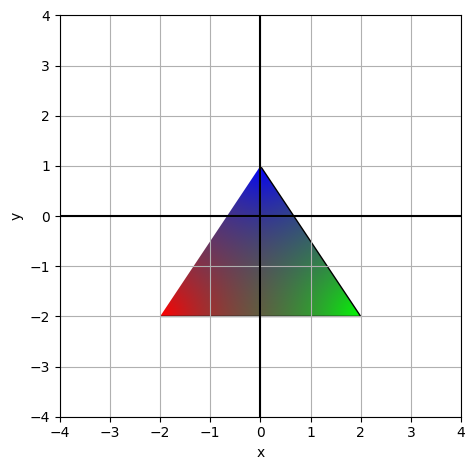

In [3]:
ax = graph() # configura o espaço para desenhar um gráfico 2D

from matplotlib.path import Path
from matplotlib.patches import PathPatch

poly = np.array([[ -2.0,  2.0, 0.0],
                 [ -2.0, -2.0, 1.0]])
p0 = poly.mean(axis=1)
x0, y0 = p0
L = poly[0,:].ptp()
delta = 0.02
x = np.arange(x0 -L, x0 + L, delta)
y = np.arange(y0 -L, y0 + L, delta)
X, Y = np.meshgrid(x, y)
d1 = np.sqrt((X-poly[0][0])**2 + (Y-poly[1][0])**2)
d2 = np.sqrt((X-poly[0][1])**2 + (Y-poly[1][1])**2)
d3 = np.sqrt((X-poly[0][2])**2 + (Y-poly[1][2])**2)
eps = 1e-9
d1  = 1/(d1 + eps)
d2  = 1/(d2 + eps)
d3  = 1/(d3 + eps)
d = np.dstack([d1, d2, d3])
d = d/(d.sum(axis=2)[:, :, np.newaxis])
path = Path(poly.T)
patch = PathPatch(path, facecolor='none')
ax.add_patch(patch)
ax.imshow(d, origin='lower', clip_path=patch, extent=[x0-L, x0+L, y0-L, y0+L])
